<a href="https://colab.research.google.com/github/Ajeet-18/Machine-Learning/blob/main/pa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Assignment 1
You are given $n$ documents (labels $\in \{-1,+1\}$), each consisting of $n_i$ words from some finite vocabulary $\mathsf{V=\{v_1,v_2,\dots,v_d\}}$ with size $d$.
We represent document $i$ by a vector
$$
    \mathsf{\mathbf{x_i} = \begin{pmatrix} \mathsf{x_{i1}, x_{i2},\dots,x_{id},1 }\end{pmatrix}}
$$ where $x_{ij}=$ number of times that word $v_j$ appears in document $i$.
Now let matrix $X$ of size $n$ by $d+1$ where its $i$-th row is equal to $\mathbf{x_i}$; i.e.
$$
    \mathsf{X = \begin{pmatrix} \mathsf{x_{ij}} \end{pmatrix}_{i\in[n],j\in[d+1]}}
$$
also let vector $\mathbf{y} \in \{-1,+1\}^n$ be
$$
    \mathbf{y}=\begin{pmatrix} \mathsf{y_1 \\
                                   y_2 \\
                                   \dots \\
                                   y_n}
                                   \end{pmatrix}
$$
wher $y_i$ is the label of document $i$.
### Buidling $X$ and $\mathbf{y}$
You are given two text files
1. `train.txt`: training set (labeled documents)
2. `test.txt`: test set (unlabeled documents)

in `train.txt`:
- line $1$ is the number of documents in training set $n_{\mathrm{train}}$
- line $2i$ contain words in document $i$ separated by space  ($i=1,2,\dots,n_{\mathrm{train}}$)
- line $2i+1$ contain label for document $i$    ($i=1,2,\dots,n_{\mathrm{train}}$)

in `test.txt`:
- line $1$ is the number of documents in training set $n_{\mathrm{test}}$
- line $i+1$ contain words in document $i$ separated by space  ($i=1,2,\dots,n_{\mathrm{test}}$)

Now let's build $X_\mathrm{train}$,$X_\mathrm{test}$, and $\mathbf{y}_{\mathrm{train}}$ as defined above using `train.txt` and `test.txt`

### IMPORTANT
- Documents are numbered as they appear in the input file
- let Vocabulary $V=(v_1,v_2,\dots,v_d)$ be **sorted** list of all distinct word in the documents of **training** set.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# (ACT1-3) using input files compute the following
#ACT1
with open('train.txt', 'r') as file:
    docs_train_list = [line.strip().split() for line in file if len(line) > 5]

#ACT2
with open('test.txt', 'r') as file:
    docs_test_list = [line.strip().split() for line in file if len(line) > 5]

# ACT3
with open('train.txt', 'r') as file:
    docs_train_list_levels = [line.strip().split() for line in file if len(line) <= 3]
level = []
for i in range(len(docs_train_list_levels)):
    level.append(int(docs_train_list_levels[i][0]))

docs_train = docs_train_list #list of documents where each document is a list of words
docs_test = docs_test_list #list of documents where each document is a list of words
labels = level  #list of labels each either -1 or +1

n_train = len(docs_train)
n_test = len(docs_test)
print(docs_train[40])
print(docs_test[40])

#CHECKS
assert((n_train+n_test)==1500)
assert(np.sum(np.array(labels).astype(int))== -348)
assert(len(docs_train[1])+len(docs_test[1])==12)

['WAcqG', 'Rv', 'zY#tE', 'tgU', 'tgU', 'tgU']
['LnGi', 'LnGi', 'dZJa', 'Rv', 'Rv', 'ITZM']


In [ ]:
# (ACT4) design a function that takes list of documents (list of list of words)
# as input and returns sorted list of distinct words
# use built-in sort in python for sorting strings
def make_vocabulary(docs):
    words = []  # Initialize an empty list to store unique words
    for i in range(len(docs)):
        for j in range(len(docs[i])):
            if docs[i][j] not in words:
                words.append(docs[i][j])  # Add unique words to the list
    words.sort()  # Sort the list of words alphabetically
    return words

vocab = make_vocabulary(docs_train)
d = len(vocab)
w2i = {vocab[i]:i for i in range(len(vocab))} # maps words in dictionary to corresponding index
print(vocab)
print(w2i)

#CHECKS
assert(vocab[2]=="LnGi")
assert(vocab == sorted(vocab))

['ITZM', 'JgwBu', 'LnGi', 'OnJECH', 'Rv', 'WAcqG', 'dZJa', 'iWgN', 'tgU', 'zY#tE']
{'ITZM': 0, 'JgwBu': 1, 'LnGi': 2, 'OnJECH': 3, 'Rv': 4, 'WAcqG': 5, 'dZJa': 6, 'iWgN': 7, 'tgU': 8, 'zY#tE': 9}


In [ ]:
# (ACT5) design a function that takes
# (1) docs: list of documents (i.e. list of list of words)
# (2) w2i: a dictionary that maps words to index
# output numpy matrix X as described above with shape of (n,d+1) -- where d is size of vocabulary
# (DO NOT forget last column of X which is all 1)

def make_matrix(docs, w2i):
    # Initialize an empty matrix with zeros
    X = [[0 for i in range(len(w2i) + 1)] for i in range(len(docs))]

    for i in range(len(docs)):
        X[i][-1] = 1  # Set the last column to 1

        for k in w2i:
            X[i][w2i[k]] = docs[i].count(k)  # Count occurrences of each word and update the matrix

    return X

X_train = make_matrix(docs_train,w2i)
X_test = make_matrix(docs_test,w2i)
y_train = np.array(labels)

In [ ]:
# (ACT6-8)
print ("First 5 rows of X_train: ")
print(X_train[:5])
print ("Last 5 rows of X_test: ")
print(X_train[996:1000])
print ("First 10 labels of training set:")
print (labels[:10])

#CHECKS
assert(np.sum(X_train)==6871)
assert(np.sum(X_test)==3462)
assert(np.sum(X_test[10] + X_train[10]) == 11)

First 5 rows of X_train: 
[[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1], [3, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1], [1, 1, 0, 0, 0, 1, 0, 1, 3, 2, 1], [1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1]]
Last 5 rows of X_test: 
[[0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 3, 1, 1], [2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]]
First 10 labels of training set:
[-1, 1, -1, 1, -1, -1, 1, -1, -1, -1]


## Linear Predictor

Let $\mathbf{w} \in \mathbb{R}^{d+1}$, for a single document $\mathbf{x} \in \mathbb{R}^{d+1}$, our predicted label is
$$
    \mathsf{\hat{y} = \mathrm{sign}({\mathbf{w} \cdot \mathbf{y}})}
$$
where
$$
    \displaystyle  \mathrm{sign}(\alpha) = \begin{cases}
      +1 & \alpha \geq 0 \\
      -1 & \alpha < 0 \\
    \end{cases}
$$

Therefore, for documents matrix $X \in \mathbb{R}^{n\times(d+1)}$ we predict labels $\hat{\mathbf{y}} \in \{-1,+1\}^n$
$$
    \hat{\mathbf{y}} = \mathrm{sign}(X\mathbf{w})
$$
where $\mathrm{sign()}$ here is defined to elementwise applying the sign we defined previously.

The error of our prediction over $X$ with true labels $\mathbf{y}$, is defined to be
$$
    \mathsf{\mathrm{error}=\frac{1}{n}\sum_{i=1}^{n}\ell_{01}(y_i,\hat{y}_i)}
$$
where $\displaystyle \mathsf{ \ell_{01}(y,\hat{y})= \begin{cases} 1 & y\neq\hat{y} \\ 0 & \text{otherwise}\end{cases} }$

In [ ]:
# (ACT9) Design a function that takes y (list of true labels) and y_hat (list of predicted labels)
# and computes the error
def err(y,y_hat):
    count = 0  # Initialize a counter for misclassified instances

    # Loop through each element in the lists and count misclassifications
    for i in range(len(y)):
        if y[i] != y_hat[i]:
            count = count + 1

    # Calculate the error rate as the fraction of misclassified instances
    return count / len(y)

#CHECKS
assert(err([-1,+1,-1,+1],[+1,+1,+1,-1])==0.75)
assert(err([+1,+1,+1,+1],[+1,+1,+1,-1])==0.25)
assert(err([-1,-1,-1,+1],[+1,+1,+1,-1])==1)

In [ ]:
# (ACT10) Design a function that takes as input
# (1) document matrix X --- numpy array shape =  (n,d+1)
# (2) vector w --- numpy array shape = (d+1,1) or (d+1,)
# and output
# (1) predictions y_hat --- numpy array shape = (n,1)
def predict(X,w):
    y_hat1 = []  # Initialize an empty list for predicted labels

    # Loop through each row in the matrix
    for i in range(len(X)):
        sum = 0

        # Compute the dot product of X[i] and w
        for j in range(len(w)):
            sum = sum + X[i][j] * w[j]

        # Make a prediction based on the sign of the dot product
        if sum >= 0:
            y_hat1.append(1)
        else:
            y_hat1.append(-1)

    # Convert the list to a numpy array for consistency
    y_hat = np.array(y_hat1)

    return y_hat

#CHECKS
assert(np.sum(predict(X_train,np.ones(d+1).reshape(-1,1)).reshape(-1,1))==n_train)

### Candidate list for $\mathbf{w}$
we give you a small candidates list `candids` of $\mathbf{w}$'s. We want you to find $\mathbf{w}^*$ in this list which gives you the smallest error over **training set**.

In [ ]:
# Loading candidates list candids = [w0,w1,...]
import pickle
with open('candids.pkl', 'rb') as f:
    candids = pickle.load(f)
print("size of candidates lists :", len(candids))
print("size of each w in candidates lists :", len(candids[0]))
print(candids[0])

size of candidates lists : 10
size of each w in candidates lists : 11
[[ 0.24771893]
 [ 0.0797402 ]
 [ 0.06736309]
 [ 0.12221225]
 [ 0.00692924]
 [ 0.30678176]
 [ 0.1730867 ]
 [ 0.02923004]
 [ 0.33520645]
 [ 0.06869451]
 [-0.8189899 ]]


In [ ]:
# (ACT11) fill err_list with training error of each candidate w
err_list = []  # Initialize an empty list to store errors for each candidate w

# Loop through each candidate w in candids
for i in range(len(candids)):
    # Predict labels using the current candidate w
    y_pred = predict(X_train, candids[i])

    # Compute the error between true labels and predicted labels
    e = err(y_train, y_pred)

    # Append the error to the err_list
    err_list.append(e)

# (ACT12) index of w with the smallest error over training set
best_index = np.argmin(err_list)

print("Training Error of candidates:")
for i, err in enumerate(err_list):
    print(f"Candidate #{i} has error {err}")

print("Index of the best predictor: %d" % best_index)
print("Best Predictor:")
print(candids[best_index])
print(np.sum(err_list))

# CHECKS
assert(np.sum(err_list) <= 2.5)


Training Error of candidates:
Candidate #0 has error 0.252
Candidate #1 has error 0.273
Candidate #2 has error 0.0
Candidate #3 has error 0.285
Candidate #4 has error 0.29
Candidate #5 has error 0.327
Candidate #6 has error 0.18
Candidate #7 has error 0.265
Candidate #8 has error 0.223
Candidate #9 has error 0.206
Index of the best predictor: 2
Best Predictor:
[[ 0.22045993]
 [ 0.        ]
 [ 0.        ]
 [ 0.11585252]
 [ 0.        ]
 [ 0.28635182]
 [ 0.14144608]
 [ 0.        ]
 [ 0.25414682]
 [ 0.        ]
 [-0.87828279]]
2.301


In [ ]:
# Best predictor
w_best = candids[best_index]

# (ACT13) Use w_best to predict labels for X_test
y_test = predict(X_test, w_best)

# (ACT14) print first 10 labels predicted for test set
print("First 10 labels predicted for the test set:")
print(y_test[:10])

#CHECKS
def my_hash(y):
    p1 = 28433
    p2 = 577
    ret = 0
    for e in range(len(y)):
        ret = ((ret*p2+int(e)) % p1 + p1) % p1
    return ret
assert(my_hash(y_test) == 19262)

First 10 labels predicted for the test set:
[ 1 -1  1 -1 -1 -1 -1 -1 -1 -1]


## Frequency of words

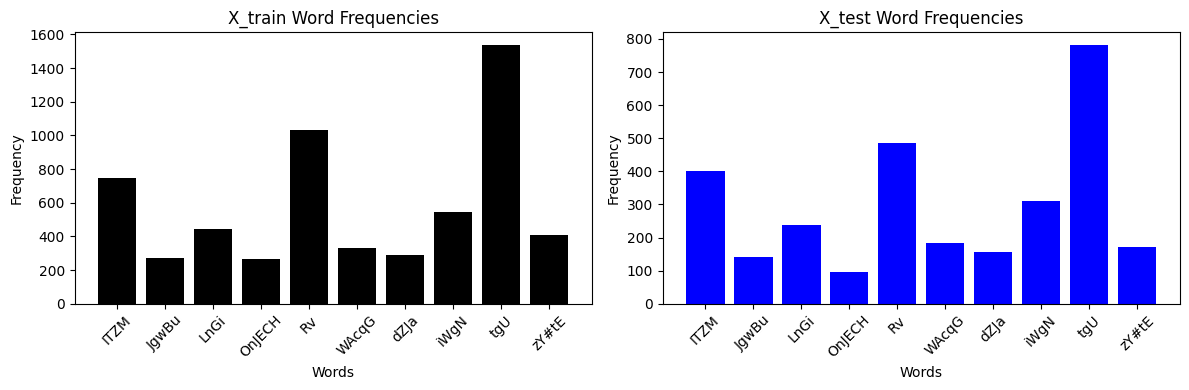

In [ ]:
# (ACT15) using X_train and X_test
# plot frequency (number of times it appeared) of each word using index of words as x-axis
# using two subplots (bar plots) one for X_train and one for X_test
# you might find plt.bar useful
import matplotlib.pyplot as plt

# Example data (replace with your actual X_train and X_test)
X_train = docs_train_list
X_test = docs_test_list

# Flatten the lists to get a single list of words
flat_X_train = [word for sublist in X_train for word in sublist]
flat_X_test = [word for sublist in X_test for word in sublist]

# Get unique words and their counts for X_train and X_test
unique_words_train, counts_train = np.unique(flat_X_train, return_counts=True)
unique_words_test, counts_test = np.unique(flat_X_test, return_counts=True)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns for subplots

# Plot for X_train
axs[0].bar(unique_words_train, counts_train, color='black')
axs[0].set_title('X_train Word Frequencies')
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Frequency')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks for better readability
axs[0].set_xticks(range(len(unique_words_train)))

# Plot for X_test
axs[1].bar(unique_words_test, counts_test, color='blue')
axs[1].set_title('X_test Word Frequencies')
axs[1].set_xlabel('Words')
axs[1].set_ylabel('Frequency')
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks for better readability
axs[1].set_xticks(range(len(unique_words_test)))

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

